![Portada](https://i.pinimg.com/originals/aa/fc/95/aafc95cf0bc95a02cc263ca63c388c72.jpg)

With the aid of Bagehot's contributions (The Only Game in Town Links to an external site.), and Copeland & Galai's model (Information Effects on the Bid-Ask Spread Links to an external site.) demonstrated how, even without transaction costs, a spread would exist. This led us to maximize the market maker's profit function in terms of a Bid & Ask price.

### Parameters

1. **Stock Price Follows a Lognormal Distribution:**
   - Distribution: $
   P \sim \text{Lognormal}(60, 2.25)
   $
   - Parameters: $\mu = 60$, $\sigma^2 = 2.25$
   - Description: Indicates that the stock price follows a lognormal distribution with a mean of $60$ and a variance of $2.25$.

2. **Probability of an Informed Trade:**
   - $\Pi_I = 0.4$
   - Description: Represents the probability that a trade is informed, set at $40\%$.

3. **Buy Limit Probability ($\Pi_{LB}$) as a Function of $S$:**
   - $\Pi_{LB}(S) = 0.5 - 0.08S$
   - Constraints: $\Pi_{LB} \in [0, 0.5]$
   - Description: Defines $\Pi_{LB}$, the probability of a buy limit, as a linear function of $S$, where $S = (A - S_0)$, $A$ is the proposed stock price, and $S_0$ is the initial stock price.

4. **Sell Limit Probability ($\Pi_{LS}$) as a Function of $S$:**
   - $\Pi_{LS}(S) = 0.5 - 0.08S$
   - Constraints: $\Pi_{LS} \in [0, 0.5]$
   - Description: Defines $\Pi_{LS}$, the probability of a sell limit, as a linear function of $S$, where $S = (S_0 - B)$, $S_0$ is the initial stock price, and $B$ is the bid price.

5. **Initial Stock Price $S_0$:**
   - $S_0 = 65$
   - Description: Sets the initial stock price at $65$, indicating the price before any trades occur.


Use this wisely:

$$
\begin{aligned}
& \max _{K_A, K_B}\left\{\left(1-p_I\right)\left[p_{B L}\left(K_A-S_0\right)+p_{S L}\left(S_0-K_B\right)\right]\right. \\
&\left.-p_I\left[\int_{K_A}^{\infty}\left(S-K_A\right) f(S) d S+\int_0^{K_B}\left(K_B-S\right) f(S) d S\right]\right\} \geq 0
\end{aligned}
$$

where: 
- $( K_A )$: Proposed selling price or "ask" price.
- $( K_B )$: Proposed buying price or "bid" price.
- $( p_I )$: Probability of an informed trade (( $Pi_I = 0.4 $)).
- $( p_{LB} )$: Buy limit probability as a function of $( S )$ ($( \Pi_{LB}(S) $)).
- $( p_{LS} )$: Sell limit probability as a function of $( S $) ($( \Pi_{LS}(S) $)).
- $( S_0 )$: Initial stock price (65).
- $( S )$: Stock price, which follows a lognormal distribution with $( \mu = 60 )$ and $( \sigma^2 = 2.25 )$.
- $( f(S) )$: The probability density function of the lognormal distribution of stock prices.


---

A Jupyter notebook containing:
- Plot the price distribution.

Create a plot showing:
- Expected revenue if all trades are liquidity trades, and $\Pi_{LB} = \Pi_{LS} = 0.5$.
- Expected revenue if there is a 40% chance that an informed trade will be executed, keep the same liquidity probabilities as the previous point.
- Expected revenue considering:
  - $\Pi_I = 0.4$
  - $\Pi_{LB}(S) = 0.5 - 0.08S$ where $\Pi_{LB}: [0, 0.5]$
  - $\Pi_{LS}(S) = 0.5 - 0.08S$ where $\Pi_{LS}: [0, 0.5]$

Determine the optimal Bid / Ask price using Copeland & Galai's model with the defined parameters.


---

In [4]:
from sympy import integrate, init_printing as sp
from sympy.abc import x as xsp
import scipy.stats as st
import scipy.optimize as opt
import tqdm
from scipy.integrate import quad
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Distribution's price plot

/Users/luisrobles/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/luisrobles/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


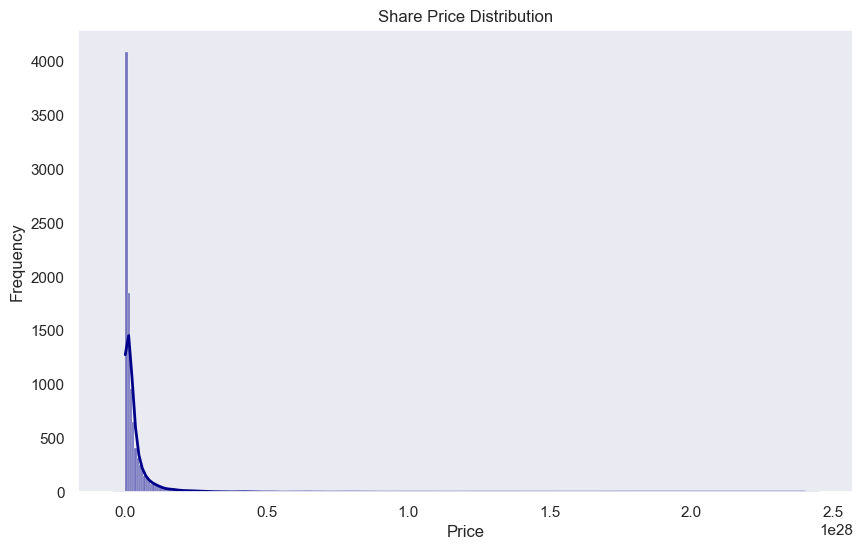

In [27]:
# Parameters for a Lognormal distribution
mu = 60
sigma = np.sqrt(2.25)

num_simulations = 10000
prices = np.random.lognormal(mean=mu, sigma=sigma, size=num_simulations)

# Establecer el estilo del gráfico
sns.set(style="dark")

plt.figure(figsize=(10, 6))
sns.histplot(prices, bins=300, kde=True, color='darkblue', fill=True, line_kws={'linewidth': 2})
plt.title('Share Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Añadir línea de densidad de kernel (KDE)
sns.kdeplot(prices, color="navy", linewidth=2, alpha=0.7)

plt.show()


### 1. Expected revenue if all are liquidity trades, and $\Pi_{LB}=\Pi_{LS} =0.5$

When all trades are liquidity trades with both buy and sell limit probabilities ($\Pi_{LB}$ and $\Pi_{LS}$ 	
 ) set to 0.5, the expected revenue calculation assumes an equal chance (50%) for liquidity transactions to occur at any given ask or bid price, without the influence of informed trades. This scenario simplifies market activity to purely liquidity-driven transactions, where gains from buy and sell orders are adjusted by a fixed probability, disregarding potential losses from price deviations in informed trading.



In [5]:
import numpy as np
from scipy import integrate, optimize

class MarketPricing:
    def __init__(self, So, stddev, meanlog):
        self.So = So  # Initial stock price
        self.stddev = stddev  # Standard deviation for the lognormal distribution
        self.meanlog = meanlog  # Mean log for the lognormal distribution
    
    def expected_revenue_liquidity_trades(self, x):
        Ask, Bid = x
        Spread = Ask - Bid  # Spread between Ask and Bid
        P_lb = P_ls = 0.5  # Probabilities for buy limit and sell limit are both 0.5
        
        # Function for loss due to buying above the ask price
        def f1(P):
            return (P - Ask) * (1 / (P * self.stddev * np.sqrt(2 * np.pi))) * np.exp(-((np.log(P) - self.meanlog)**2 / (2 * self.stddev**2)))
        
        # Function for loss due to selling below the bid price
        def f2(P):
            return (Bid - P) * (1 / (P * self.stddev * np.sqrt(2 * np.pi))) * np.exp(-((np.log(P) - self.meanlog)**2 / (2 * self.stddev**2)))

        # Integrate the loss functions over the price ranges
        Int1, _ = integrate.quad(f1, Ask, np.inf)
        Int2, _ = integrate.quad(f2, 0, Bid)

        # Total expected revenue from liquidity trades
        U = (Ask - self.So) * P_lb + (self.So - Bid) * P_ls - (Int1 + Int2)

        return U  # Revenue is returned directly without negation as we're not minimizing
    
    def optimize_ask_bid_liquidity(self):
        bounds = [(0, None), (0, None)]  # Constraints for Ask and Bid to be positive
        constraints = ({'type': 'ineq', 'fun': lambda x: x[0] - x[1]})  # Constraint that Ask must be greater than Bid

        # Use scipy.optimize.minimize to find the optimal Ask and Bid prices
        result = optimize.minimize(
            lambda x: -self.expected_revenue_liquidity_trades(x),  # Negate revenue for minimization
            x0=[70, 60],  # Initial values for Ask and Bid
            bounds=bounds,
            constraints=constraints,
            method='SLSQP'  # Optimization method
        )
        return result.x

# Initialize MarketPricing with given parameters
stddev = 2.25  # Standard deviation for lognormal distribution
meanlog = np.log(60)  # Mean log for lognormal distribution

# Create an instance of MarketPricing and optimize for liquidity trades
market_pricing = MarketPricing(So, stddev, meanlog)
Ask_opt, Bid_opt = market_pricing.optimize_ask_bid_liquidity()

print("Optimal Ask Price for Liquidity Trades:", Ask_opt)
print("Optimal Bid Price for Liquidity Trades:", Bid_opt)

Optimal Ask Price for Liquidity Trades: 1.9716105310985198e+43
Optimal Bid Price for Liquidity Trades: 1.1104856911484735e+37


/var/folders/64/fgkl3fks7m33skzrpztqylr00000gn/T/ipykernel_14242/2461503559.py:21: RuntimeWarning: divide by zero encountered in scalar divide
  return (Bid - P) * (1 / (P * self.stddev * np.sqrt(2 * np.pi))) * np.exp(-((np.log(P) - self.meanlog)**2 / (2 * self.stddev**2)))
/var/folders/64/fgkl3fks7m33skzrpztqylr00000gn/T/ipykernel_14242/2461503559.py:21: RuntimeWarning: invalid value encountered in scalar multiply
  return (Bid - P) * (1 / (P * self.stddev * np.sqrt(2 * np.pi))) * np.exp(-((np.log(P) - self.meanlog)**2 / (2 * self.stddev**2)))
/var/folders/64/fgkl3fks7m33skzrpztqylr00000gn/T/ipykernel_14242/2461503559.py:21: RuntimeWarning: divide by zero encountered in log
  return (Bid - P) * (1 / (P * self.stddev * np.sqrt(2 * np.pi))) * np.exp(-((np.log(P) - self.meanlog)**2 / (2 * self.stddev**2)))
/var/folders/64/fgkl3fks7m33skzrpztqylr00000gn/T/ipykernel_14242/2461503559.py:25: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration inter

In [1]:
import numpy as np
from scipy import integrate, optimize

class MarketOptimizer:
    def __init__(self, So, Prob_Inf, stddev, meanlog, size=100):
        self.So = So
        self.Prob_Inf = Prob_Inf
        self.Prob_Liq = 1 - Prob_Inf
        self.stddev = stddev
        self.meanlog = meanlog
        self.size = size
        self.P = np.random.lognormal(meanlog, stddev, size)
    
    def objective_function(self, Ask, Bid):
        S_lb = Ask - self.So  # Profit
        S_ls = self.So - Bid  # Loss
        P_lb = 0.5 - 0.08 * S_lb
        P_ls = 0.5 - 0.08 * S_ls
        
        def f1(P):
            return (P - Ask) * (1 / (P * self.stddev * np.sqrt(2 * np.pi))) * np.exp(-((np.log(P) - self.meanlog)**2 / (2 * self.stddev**2)))
        
        def f2(P):
            return (Bid - P) * (1 / (P * self.stddev * np.sqrt(2 * np.pi))) * np.exp(-((np.log(P) - self.meanlog)**2 / (2 * self.stddev**2)))
        
        Int1, _ = integrate.quad(f1, Ask, 10 * self.stddev)
        Int2, _ = integrate.quad(f2, 0, Bid)
        
        L = Int1 + Int2
        U = (Ask - self.So) * self.Prob_Inf * P_lb + (self.So - Bid) * self.Prob_Liq * P_ls - self.Prob_Inf * L
        
        return -U  # Negativo para cumplir con la convención de minimize
    
    def optimize_ask_bid(self):
        bounds = [(0, None), (0, None)]  # Restricciones para ask y bid > 0 
        constraints = ({'type': 'ineq', 'fun': lambda x: x[0] - x[1]})  # Ask > Bid
        
        result = optimize.minimize(
            lambda x: self.objective_function(x[0], x[1]),
            x0=[70, 60],  # Valores iniciales para ask y bid
            bounds=bounds,
            constraints=constraints,
            method='SLSQP'  # Método de optimización
        )
        return result.x[0], result.x[1]

# Uso de la clase MarketOptimizer
So = 65
Prob_Inf = 0.4
stddev = 2.25
meanlog = np.log(60)

market_optimizer = MarketOptimizer(So, Prob_Inf, stddev, meanlog)
Ask_opt, Bid_opt = market_optimizer.optimize_ask_bid()

print("El Ask óptimo es:", Ask_opt)
print("El Bid óptimo es:", Bid_opt)


El Ask óptimo es: 66.95011995396433
El Bid óptimo es: 59.79421759085969
